# Pull Plot

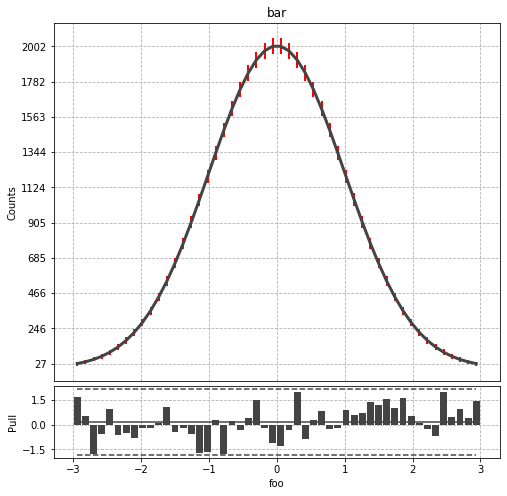

In [1]:
from hist import NamedHist, axis, Hist
import numpy as np

data = np.random.normal(size=42_000)
h = NamedHist(
    axis.Regular(50, -3, 3, name='foo'),
)
h.fill(foo=data)

def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-.5*x**2)

ax1, ax2 = h.pull_plot(pdf, title='bar', sigma=2)


# Named Histogram

## Duplicate name checking

In [2]:
h = NamedHist(
    axis.Regular(50, -3, 3, name='foo'),
    axis.Regular(50, -3, 3, name='foo'),
)

ValueError: Following axis names are not unique: `['foo']`.

## Mixed indexing with checks

In [3]:
h = NamedHist(
    axis.Regular(50, -3, 3, name='foo'),
    axis.Regular(50, -3, 3, name='bar'),
)
h.fill(foo=data, bar=data)
h[{'foo': 0, 0: slice(None, None, None)}]

ValueError: Found duplicate indices for following entries: `[(0, 'foo')]`.

# Improvements

Possible improvements for the plot:
 
- more variability in terms of options (saving, text color, marging)
- handling of multiple axes
- more error checking, typing, unit tests

Improvements regarding the NamedHist code:

- easier switching between NamedHist.fill and Hist.fill (most likely requires changes to Hist's fill)
- simpler error checking while retaining the verbosity (less is more)
- metaprogramming for __getitem__ (create at runtime, useful for autocomplete, only keyword arguments)